7. Boosting
a. Cross Validation
b. AdaBoost

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [10]:
# Load the dataset
df = pd.read_csv('data/DailyDelhiClimate.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Feature selection
X = df[['humidity', 'wind_speed', 'meanpressure']]  # Using these features for prediction
y = df['meantemp']  # Target variable (meantemp)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train,X_test)

       humidity  wind_speed  meanpressure
1066  70.250000    7.187500   1016.000000
638   52.857143    3.171429   1010.428571
799   69.875000    6.025000   1018.125000
380   90.571429    1.585714   1019.571429
303   58.833333    3.083333   1012.833333
...         ...         ...           ...
1130  70.666667    2.166667   1016.833333
1294  91.266667    7.653333   1000.800000
860   32.625000   10.887500   1003.625000
1459  89.666667    6.266667   1017.904762
1126  65.769231    7.269231   1017.153846

[1169 rows x 3 columns]        humidity  wind_speed  meanpressure
892   34.625000   12.737500    998.500000
1106  69.687500    6.031250   1014.937500
413   60.125000    8.800000   1017.375000
522   22.750000   13.187500    994.000000
1036  67.875000    0.475000   1014.250000
...         ...         ...           ...
1362  66.480000    5.496154   1352.615385
802   64.625000    7.875000   1015.125000
651   67.625000    5.325000   1010.875000
722   83.000000    3.475000   1021.250000
254   60.

In [11]:
# Initialize AdaBoost with a Decision Tree Regressor as the base estimator
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(ada_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean Cross-Validation Score: {-mean_cv_score:.4f}")
print(f"Standard Deviation of CV Score: {std_cv_score:.4f}")


Mean Cross-Validation Score: 8.3875
Standard Deviation of CV Score: 1.2256


Test Set MSE: 7.7198


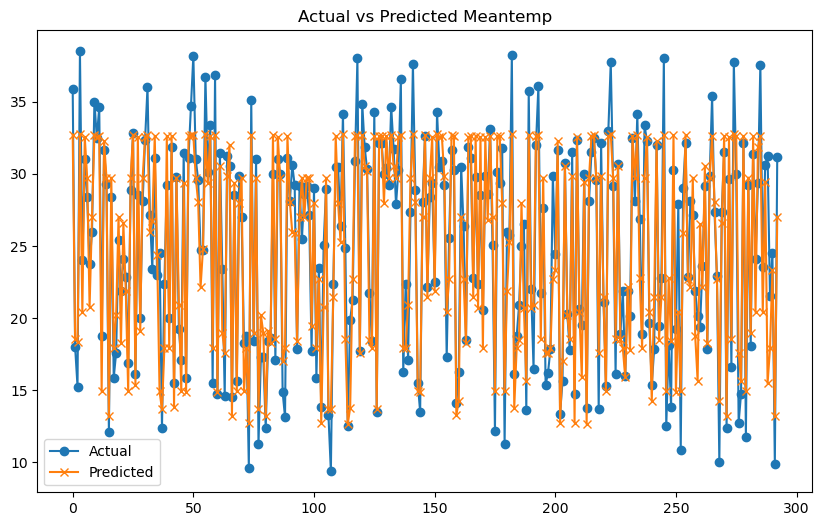

In [9]:
# Fit AdaBoost Regressor on the training data
ada_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_reg.predict(X_test)

# Evaluate performance (using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {mse:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Meantemp')
plt.legend()
plt.show()
